<a href="https://colab.research.google.com/github/skmtyuu/my_code/blob/main/intern2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_x = pd.read_csv('train_x.csv',encoding='utf-8')
train_y = pd.read_csv('train_y.csv')


In [ ]:
train_y

,お仕事No.,応募数 合計
0,2203566799,1.945910
1,2203546900,3.951244
2,2203546900,3.295837
3,2203545344,3.970292
4,2203545344,3.784190
...,...,...
15848,5903549258,0.000000
15849,5903542254,0.000000
15850,5903542254,0.000000
15851,5203533881,0.693147


In [ ]:
df=pd.merge(train_x,train_y,on='お仕事No.')
df_x=df.drop(['お仕事No.','応募数 合計'],axis=1)
df_y=df['応募数 合計']

In [ ]:
pd.set_option('display.max_columns', 220)
pd.set_option('display.max_rows', 220)

In [ ]:
df_x.isnull().apply(lambda col: col.value_counts(), axis=0).fillna(0).astype(np.float).apply(lambda col: col/col.sum(), axis=0)

,職場の様子,（紹介予定）入社後の雇用形態,勤務地 最寄駅3（駅名）,勤務地固定,休日休暇(月曜日),応募先 名称,（派遣先）配属先部署 男女比 男,勤務地 最寄駅3（沿線名）,（派遣先）勤務先写真コメント,勤務地 最寄駅3（分）,無期雇用派遣,勤務地 最寄駅2（駅名）,未使用.14,（派遣以外）応募後の流れ,（派遣先）概要 従業員数,電話応対なし,大手企業,（紹介予定）雇用形態備考,週払い,週1日からOK,交通費別途支給,（派遣先）配属先部署 人数,固定残業制 残業代 下限,残業月20時間以上,職種コード,1日7時間以下勤務OK,ミドル（40〜）活躍中,ルーティンワークがメイン,未使用.11,短時間勤務OK(1日4h以内),駅から徒歩5分以内,フリー項目 内容,先輩からのメッセージ,対象者設定 年齢下限,未使用.10,学校・公的機関（官公庁）,土日祝のみ勤務,掲載期間 開始日,動画コメント,Wordのスキルを活かす,未使用.8,経験必須,固定残業制 残業代に充当する労働時間数 下限,給与/交通費 給与支払区分,ブロックコード2,勤務地 最寄駅1（分）,未使用.4,CAD関連のスキルを活かす,未使用.7,メモ,派遣スタッフ活躍中,ブロックコード3,固定残業制,WEB面接OK,大量募集,公開区分,17時以降出社OK,寮・社宅あり,20代活躍中,Accessのスキルを活かす,検索対象エリア,就業形態区分,ネットワーク関連のスキルを活かす,Wワーク・副業可能,勤務地 最寄駅2（沿線名）,休日休暇(火曜日),固定残業制 残業代に充当する労働時間数 上限,プログラム関連のスキルを活かす,未使用.15,平日休みあり,（派遣先）概要 勤務先名（漢字）,勤務地 最寄駅2（駅からの交通手段）,休日休暇 備考,30代活躍中,フラグオプション選択,未使用.12,エルダー（50〜）活躍中,（派遣）応募後の流れ,期間・時間 勤務時間,期間・時間 勤務期間,派遣形態,人材紹介,週2・3日OK,主婦(ママ)・主夫歓迎,勤務先公開,Excelのスキルを活かす,16時前退社OK,正社員登用あり,残業月20時間未満,勤務地 備考,英語力不要,拠点番号,休日休暇(日曜日),雇用形態,Dip JobsリスティングS,ブロックコード1,フリー項目 タイトル,社員食堂あり,（紹介予定）入社時期,お仕事名,資格取得支援制度あり,未使用.1,ブランクOK,対象者設定 年齢上限,未使用.20,10時以降出社OK,社会保険制度あり,募集形態,期間・時間 勤務開始日,英語以外の語学力を活かす,休日休暇(祝日),勤務地 最寄駅3（駅からの交通手段）,外資系企業,（派遣先）勤務先写真ファイル名,応募先 最寄駅（沿線名）,服装自由,仕事写真（下） 写真1 ファイル名,PowerPointのスキルを活かす,未使用.16,仕事写真（下） 写真3 ファイル名,オープニングスタッフ,応募先 所在地 ブロックコード,（派遣先）配属先部署,（派遣先）配属先部署 男女比 女,応募先 所在地 都道府県,動画タイトル,仕事内容,（派遣先）概要 事業内容,応募先 最寄駅（駅名）,残業月10時間未満,休日休暇(土曜日),（紹介予定）年収・給与例,外国人活躍中・留学生歓迎,履歴書不要,未使用.17,休日休暇(木曜日),未使用.9,研修制度あり,日払い,未使用,勤務地 最寄駅1（沿線名）,未使用.18,未使用.22,未使用.5,（派遣先）配属先部署 平均年齢,英語力を活かす,勤務地 周辺情報,仕事写真（下） 写真2 ファイル名,バイク・自転車通勤OK,仕事写真（下） 写真2 コメント,DTP関連のスキルを活かす,会社概要 業界コード,勤務地 都道府県コード,未使用.3,PCスキル不要,車通勤OK,制服あり,給与/交通費 給与上限,休日休暇(水曜日),未使用.2,WEB関連のスキルを活かす,仕事の仕方,未使用.6,給与 経験者給与下限,勤務地 最寄駅1（駅からの交通手段）,応募資格,学生歓迎,紹介予定派遣,固定残業制 残業代 上限,未使用.19,（紹介予定）休日休暇,給与 経験者給与上限,シフト勤務,経験者優遇,週4日勤務,未経験OK,派遣会社のうれしい特典,土日祝休み,給与/交通費 交通費,掲載期間 終了日,未使用.21,待遇・福利厚生,シニア（60〜）歓迎,ベンチャー企業,少人数の職場,仕事写真（下） 写真3 コメント,新卒・第二新卒歓迎,休日休暇(金曜日),お仕事のポイント（仕事PR）,産休育休取得事例あり,扶養控除内,動画ファイル名,給与/交通費 給与下限,対象者設定 性別,WEB登録OK,応募先 備考,オフィスが禁煙・分煙,応募先 所在地 市区町村,仕事写真（下） 写真1 コメント,勤務地 市区町村コード,（派遣先）職場の雰囲気,未使用.13,（紹介予定）待遇・福利厚生,勤務地 最寄駅1（駅名）,勤務地 最寄駅2（分）,応募拠点,給与/交通費 備考,残業なし,これまでの採用者例,期間･時間 備考,（派遣先）概要 勤務先名（フリガナ）
False,1.0,0.203315,0.0,1.0,1.0,0.0,0.878421,0.0,0.0,0.0,0.0,0.464348,0.0,0.0,0.0,0.0,1.0,0.203315,0.0,1.0,1.0,0.878946,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.947041,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.464348,1.0,0.0,0.0,0.0,1.0,0.044133,0.455189,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.203315,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.006447,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.999723,0.878421,0.0,1.0,1.0,0.203315,0.0,1.0,1.0,0.203315,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.708475,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.362718,1.0,0.0,0.0,1.0,0.0,0.0,0.947041,1.0,0.0,1.0,0.0,0.0,0.1674,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.999723,0.0,0.175175,1.0,0.455189,0.0,0.776376,1.0,0.0,0.249108,0.0
True,0.0,0.796685,1.0,0.0,0.0,1.0,0.121579,1.0,1.0,1.0,1.0,0.535652,1.0,1.0,1.0,1.0,0.0,0.796685,1.0,0.0,0.0,0.121054,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.052959,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.535652,0.0,1.0,1.0,1.0,0.0,0.955867,0.544811,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.796685,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.993553,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.000277,0.121579,1.0,0.0,0.0,0.796685,1.0,0.0,0.0,0.796685,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.291525,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.637282,0.0,1.0,1.0,0.0,1.0,1.0,0.052959,0.0,1.0,0.0,1.0,1.0,0.8326,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.000277,1.0,0.8

In [ ]:
#全て欠損値のカラムの削除
drop_col = ['勤務地　最寄駅3（駅名）', '応募先　名称','勤務地　最寄駅3（沿線名）','勤務地　最寄駅3（分）','無期雇用派遣','未使用.14','（派遣以外）応募後の流れ','（派遣先）概要　従業員数','電話応対なし','週払い','固定残業制 残業代 下限','未使用.11',
            'フリー項目　内容','先輩からのメッセージ','未使用.10','未使用.8','経験必須','固定残業制 残業代に充当する労働時間数 下限','ブロックコード2','未使用.4','未使用.7','メモ','ブロックコード3','WEB面接OK','17時以降出社OK','寮・社宅あり',
            'ネットワーク関連のスキルを活かす','Wワーク・副業可能','固定残業制 残業代に充当する労働時間数 上限','プログラム関連のスキルを活かす','未使用.15','未使用.12','エルダー（50〜）活躍中','人材紹介','主婦(ママ)・主夫歓迎','ブロックコード1',
            '未使用.1','ブランクOK','未使用.20','募集形態','勤務地　最寄駅3（駅からの交通手段）','応募先　最寄駅（沿線名）','仕事写真（下）　写真1　ファイル名','未使用.16','仕事写真（下）　写真3　ファイル名','オープニングスタッフ','応募先　所在地　ブロックコード'	,'（派遣先）配属先部署',
            '応募先　所在地　都道府県','応募先　最寄駅（駅名）','外国人活躍中・留学生歓迎','未使用.17','未使用.9','日払い','未使用','未使用.18','未使用.22','未使用.5','勤務地　周辺情報','仕事写真（下）　写真2　ファイル名','バイク・自転車通勤OK',
            '仕事写真（下）　写真2　コメント','未使用.3','未使用.2','WEB関連のスキルを活かす','未使用.6','給与　経験者給与下限','学生歓迎','固定残業制 残業代 上限','未使用.19','給与　経験者給与上限','未使用.21','待遇・福利厚生','シニア（60〜）歓迎','ベンチャー企業',
            '少人数の職場','仕事写真（下）　写真3　コメント','応募先　備考','応募先　所在地　市区町村','仕事写真（下）　写真1　コメント','未使用.13','応募拠点','これまでの採用者例','（派遣先）概要　勤務先名（フリガナ）','動画コメント','フリー項目　タイトル',
            '（派遣先）勤務先写真コメント']
df_x=df_x.drop(drop_col, axis=1)


In [ ]:
df_x.isnull().apply(lambda col: col.value_counts(), axis=0).fillna(0).astype(np.float).apply(lambda col: col/col.sum(), axis=0)

,職場の様子,（紹介予定）入社後の雇用形態,勤務地固定,休日休暇(月曜日),（派遣先）配属先部署 男女比 男,勤務地 最寄駅2（駅名）,大手企業,（紹介予定）雇用形態備考,週1日からOK,交通費別途支給,（派遣先）配属先部署 人数,残業月20時間以上,職種コード,1日7時間以下勤務OK,ミドル（40〜）活躍中,ルーティンワークがメイン,短時間勤務OK(1日4h以内),駅から徒歩5分以内,対象者設定 年齢下限,学校・公的機関（官公庁）,土日祝のみ勤務,掲載期間 開始日,Wordのスキルを活かす,給与/交通費 給与支払区分,勤務地 最寄駅1（分）,CAD関連のスキルを活かす,派遣スタッフ活躍中,固定残業制,大量募集,公開区分,20代活躍中,Accessのスキルを活かす,検索対象エリア,就業形態区分,勤務地 最寄駅2（沿線名）,休日休暇(火曜日),平日休みあり,（派遣先）概要 勤務先名（漢字）,勤務地 最寄駅2（駅からの交通手段）,休日休暇 備考,30代活躍中,フラグオプション選択,（派遣）応募後の流れ,期間・時間 勤務時間,期間・時間 勤務期間,派遣形態,週2・3日OK,勤務先公開,Excelのスキルを活かす,16時前退社OK,正社員登用あり,残業月20時間未満,勤務地 備考,英語力不要,拠点番号,休日休暇(日曜日),雇用形態,Dip JobsリスティングS,社員食堂あり,（紹介予定）入社時期,お仕事名,資格取得支援制度あり,対象者設定 年齢上限,10時以降出社OK,社会保険制度あり,期間・時間 勤務開始日,英語以外の語学力を活かす,休日休暇(祝日),外資系企業,（派遣先）勤務先写真ファイル名,服装自由,PowerPointのスキルを活かす,（派遣先）配属先部署 男女比 女,動画タイトル,仕事内容,（派遣先）概要 事業内容,残業月10時間未満,休日休暇(土曜日),（紹介予定）年収・給与例,履歴書不要,休日休暇(木曜日),研修制度あり,勤務地 最寄駅1（沿線名）,（派遣先）配属先部署 平均年齢,英語力を活かす,DTP関連のスキルを活かす,会社概要 業界コード,勤務地 都道府県コード,PCスキル不要,車通勤OK,制服あり,給与/交通費 給与上限,休日休暇(水曜日),仕事の仕方,勤務地 最寄駅1（駅からの交通手段）,応募資格,紹介予定派遣,（紹介予定）休日休暇,シフト勤務,経験者優遇,週4日勤務,未経験OK,派遣会社のうれしい特典,土日祝休み,給与/交通費 交通費,掲載期間 終了日,新卒・第二新卒歓迎,休日休暇(金曜日),お仕事のポイント（仕事PR）,産休育休取得事例あり,扶養控除内,動画ファイル名,給与/交通費 給与下限,対象者設定 性別,WEB登録OK,オフィスが禁煙・分煙,勤務地 市区町村コード,（派遣先）職場の雰囲気,（紹介予定）待遇・福利厚生,勤務地 最寄駅1（駅名）,勤務地 最寄駅2（分）,給与/交通費 備考,残業なし,期間･時間 備考
False,1.0,0.203315,1.0,1.0,0.878421,0.464348,1.0,0.203315,1.0,1.0,0.878946,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.947041,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.464348,1.0,1.0,0.044133,0.455189,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.203315,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.006447,1.0,1.0,0.878421,1.0,1.0,0.203315,1.0,1.0,0.203315,1.0,1.0,1.0,1.0,0.708475,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.362718,1.0,1.0,0.947041,1.0,1.0,0.1674,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.999723,0.175175,1.0,0.455189,0.776376,1.0,0.249108
True,0.0,0.796685,0.0,0.0,0.121579,0.535652,0.0,0.796685,0.0,0.0,0.121054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.052959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.535652,0.0,0.0,0.955867,0.544811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.796685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.993553,0.0,0.0,0.121579,0.0,0.0,0.796685,0.0,0.0,0.796685,0.0,0.0,0.0,0.0,0.291525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.637282,0.0,0.0,0.052959,0.0,0.0,0.8326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000277,0.824825,0.0,0.544811,0.223624,0.0,0.750892


In [ ]:
#不要なカラムの削除(他のカラムで補える特徴量など)
drop_col=['掲載期間　開始日','（派遣）応募後の流れ','（紹介予定）入社時期','（派遣先）勤務先写真ファイル名','動画タイトル','掲載期間　終了日',
          '動画ファイル名','休日休暇(月曜日)','休日休暇(火曜日)','休日休暇(木曜日)','休日休暇(水曜日)','（紹介予定）入社後の雇用形態',
          '期間・時間　勤務開始日','応募資格','派遣会社のうれしい特典','勤務地　最寄駅2（駅名）','（派遣先）概要　勤務先名（漢字）',
          '（派遣先）概要　事業内容','（派遣先）職場の雰囲気','お仕事のポイント（仕事PR）','仕事内容','勤務地　最寄駅2（沿線名）','期間･時間　備考',
          '拠点番号','お仕事名','休日休暇　備考','（紹介予定）年収・給与例','週1日からOK','土日祝のみ勤務','固定残業制','残業月20時間未満',
          '（紹介予定）雇用形態備考','給与/交通費　給与下限','休日休暇(金曜日)','給与/交通費　給与上限']
df_x=df_x.drop(drop_col, axis=1)
df_ob=df_x.select_dtypes(include=object)
df_ob.head(50)


,期間・時間 勤務時間,勤務地 備考,勤務地 最寄駅1（沿線名）,（紹介予定）休日休暇,（紹介予定）待遇・福利厚生,勤務地 最寄駅1（駅名）,給与/交通費 備考
0,9:30〜16:30 <BR>※残業はほとんどありません。<BR>※休憩は６０分です。,東京都足立区,東京メトロ千代田線,NaN,NaN,北千住,【月収例】19万5300円＋残業代（21日勤務の場合）
1,9:00〜17:00 <BR>※残業はほとんどありません。<BR>※休憩は６０分です。,東京都千代田区,東京メトロ千代田線,年間休日１２１日,完備,新御茶ノ水,【月収例】26万4600円＋残業代（21日勤務の場合）
2,9:00〜17:00 <BR>※残業はほとんどありません。<BR>※休憩は６０分です。,東京都千代田区,東京メトロ千代田線,年間休日１２１日,完備,新御茶ノ水,【月収例】26万4600円＋残業代（21日勤務の場合）
3,9:00〜17:00 <BR>※残業はほとんどありません。<BR>※休憩は６０分です。,東京都千代田区,東京メトロ千代田線,年間休日１２１日,完備,新御茶ノ水,【月収例】26万4600円＋残業代（21日勤務の場合）
4,9:00〜17:00 <BR>※残業はほとんどありません。<BR>※休憩は６０分です。,東京都千代田区,東京メトロ千代田線,年間休日１２１日,完備,新御茶ノ水,【月収例】26万4600円＋残業代（21日勤務の場合）
5,9:00〜17:00 <BR>※残業はほとんどありません。<BR>※休憩は６０分です。,東京都千代田区,東京メトロ千代田線,年間休日１２１日,完備,新御茶ノ水,【月収例】26万4600円＋残業代（21日勤務の場合）
6,9:00〜17:00 <BR>※残業はほとんどありません。<BR>※休憩は６０分です。,東京都千代田区,東京メトロ千代田線,年間休日１２１日,完備,新御茶ノ水,【月収例】26万4600円＋残業代（21日勤務の場合）
7,9:00〜17:00 <BR>※残業はほとんどありません。<BR>※休憩は６０分です。,東京都千代田区,東京メトロ千代田線,年間休日１２１日,完備,新御茶ノ水,【月収例】26万4600円＋残業代（21日勤務の場合）
8,9:00〜17:00 <BR>※残業はほとんどありません。<BR>※休憩は６０分です。,東京都千代田区,東京メトロ千代田線,年間休日１２１日,完備,新御茶ノ水,【月収例】26万4600円＋残業代（21日勤務の場合）
9,9:00〜17:00 <BR>※残業はほとんどありません。<BR>※休憩は６０分です。,東京都千代田区,東京メトロ千代田線,年間休日１２１日,完備,新御茶ノ水,【月収例】26万4600円＋残業代（21日勤務の場合）


In [ ]:
df_num=df_x.select_dtypes(exclude=object)
df_num.head()

,職場の様子,勤務地固定,（派遣先）配属先部署 男女比 男,大手企業,交通費別途支給,（派遣先）配属先部署 人数,残業月20時間以上,職種コード,1日7時間以下勤務OK,ミドル（40〜）活躍中,ルーティンワークがメイン,短時間勤務OK(1日4h以内),駅から徒歩5分以内,対象者設定 年齢下限,学校・公的機関（官公庁）,Wordのスキルを活かす,給与/交通費 給与支払区分,勤務地 最寄駅1（分）,CAD関連のスキルを活かす,派遣スタッフ活躍中,大量募集,公開区分,20代活躍中,Accessのスキルを活かす,検索対象エリア,就業形態区分,平日休みあり,勤務地 最寄駅2（駅からの交通手段）,30代活躍中,フラグオプション選択,期間・時間 勤務期間,派遣形態,週2・3日OK,勤務先公開,Excelのスキルを活かす,16時前退社OK,正社員登用あり,英語力不要,休日休暇(日曜日),雇用形態,Dip JobsリスティングS,社員食堂あり,資格取得支援制度あり,対象者設定 年齢上限,10時以降出社OK,社会保険制度あり,英語以外の語学力を活かす,休日休暇(祝日),外資系企業,服装自由,PowerPointのスキルを活かす,（派遣先）配属先部署 男女比 女,残業月10時間未満,休日休暇(土曜日),履歴書不要,研修制度あり,（派遣先）配属先部署 平均年齢,英語力を活かす,DTP関連のスキルを活かす,会社概要 業界コード,勤務地 都道府県コード,PCスキル不要,車通勤OK,制服あり,仕事の仕方,勤務地 最寄駅1（駅からの交通手段）,紹介予定派遣,シフト勤務,経験者優遇,週4日勤務,未経験OK,土日祝休み,給与/交通費 交通費,新卒・第二新卒歓迎,産休育休取得事例あり,扶養控除内,対象者設定 性別,WEB登録OK,オフィスが禁煙・分煙,勤務地 市区町村コード,勤務地 最寄駅2（分）,残業なし
0,3,1,6.0,0,0,12.0,0,22010,1,1,1,0,1,0,1,1,3,3.0,0,1,0,2,1,0,1,1,0,NaN,1,1,5,0,0,0,1,0,0,1,1,0,0,1,1,99,0,1,0,1,0,1,0,4.0,0,1,1,1,45.0,0,0,30000,13,0,0,0,2,1.0,0,0,1,0,1,1,3,1,1,0,1,1,1,121,NaN,1
1,3,1,2.0,1,0,33.0,0,20020,1,1,1,0,1,0,0,1,3,1.0,0,1,0,2,1,0,1,1,0,1.0,1,3,5,1,0,0,1,0,1,1,1,0,0,1,1,99,0,1,0,1,0,1,0,8.0,0,1,1,1,45.0,0,0,28000,13,0,0,0,1,1.0,1,0,1,0,0,1,3,1,1,0,1,1,1,101,5.0,1
2,3,1,2.0,1,0,33.0,0,20020,1,1,1,0,1,0,0,1,3,1.0,0,1,0,2,1,0,1,1,0,1.0,1,3,5,1,0,0,1,0,1,1,1,0,0,1,1,99,0,1,0,1,0,1,0,8.0,0,1,1,1,45.0,0,0,28000,13,0,0,0,1,1.0,1,0,1,0,0,1,3,1,1,0,1,1,1,101,5.0,1
3,3,1,2.0,1,0,33.0,0,20020,1,1,1,0,1,0,0,1,3,1.0,0,1,0,2,1,0,1,1,0,1.0,1,3,5,1,0,0,1,0,1,1,1,0,0,1,1,99,0,1,0,1,0,1,0,8.0,0,1,1,1,45.0,0,0,28000,13,0,0,0,1,1.0,1,0,1,0,0,1,3,1,1,0,1,1,1,101,5.0,1
4,3,1,2.0,1,0,33.0,0,20020,1,1,1,0,1,0,0,1,3,1.0,0,1,0,2,1,0,1,1,0,1.0,1,3,5,1,0,0,1,0,1,1,1,0,0,1,1,99,0,1,0,1,0,1,0,8.0,0,1,1,1,45.0,0,0,28000,13,0,0,0,1,1.0,1,0,1,0,0,1,3,1,1,0,1,1,1,101,5.0,1


In [ ]:
df_x=pd.concat([df_ob, df_num], axis=1)

In [ ]:
#再確認
df_x.isnull().apply(lambda col: col.value_counts(), axis=0).fillna(0).astype(np.float).apply(lambda col: col/col.sum(), axis=0)

,期間・時間 勤務時間,勤務地 備考,勤務地 最寄駅1（沿線名）,（紹介予定）休日休暇,（紹介予定）待遇・福利厚生,勤務地 最寄駅1（駅名）,給与/交通費 備考,職場の様子,勤務地固定,（派遣先）配属先部署 男女比 男,大手企業,交通費別途支給,（派遣先）配属先部署 人数,残業月20時間以上,職種コード,1日7時間以下勤務OK,ミドル（40〜）活躍中,ルーティンワークがメイン,短時間勤務OK(1日4h以内),駅から徒歩5分以内,対象者設定 年齢下限,学校・公的機関（官公庁）,Wordのスキルを活かす,給与/交通費 給与支払区分,勤務地 最寄駅1（分）,CAD関連のスキルを活かす,派遣スタッフ活躍中,大量募集,公開区分,20代活躍中,Accessのスキルを活かす,検索対象エリア,就業形態区分,平日休みあり,勤務地 最寄駅2（駅からの交通手段）,30代活躍中,フラグオプション選択,期間・時間 勤務期間,派遣形態,週2・3日OK,勤務先公開,Excelのスキルを活かす,16時前退社OK,正社員登用あり,英語力不要,休日休暇(日曜日),雇用形態,Dip JobsリスティングS,社員食堂あり,資格取得支援制度あり,対象者設定 年齢上限,10時以降出社OK,社会保険制度あり,英語以外の語学力を活かす,休日休暇(祝日),外資系企業,服装自由,PowerPointのスキルを活かす,（派遣先）配属先部署 男女比 女,残業月10時間未満,休日休暇(土曜日),履歴書不要,研修制度あり,（派遣先）配属先部署 平均年齢,英語力を活かす,DTP関連のスキルを活かす,会社概要 業界コード,勤務地 都道府県コード,PCスキル不要,車通勤OK,制服あり,仕事の仕方,勤務地 最寄駅1（駅からの交通手段）,紹介予定派遣,シフト勤務,経験者優遇,週4日勤務,未経験OK,土日祝休み,給与/交通費 交通費,新卒・第二新卒歓迎,産休育休取得事例あり,扶養控除内,対象者設定 性別,WEB登録OK,オフィスが禁煙・分煙,勤務地 市区町村コード,勤務地 最寄駅2（分）,残業なし
False,1.0,1.0,1.0,0.1674,0.175175,1.0,0.776376,1.0,1.0,0.878421,1.0,1.0,0.878946,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.947041,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.455189,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.878421,1.0,1.0,1.0,1.0,0.708475,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.947041,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.455189,1.0
True,0.0,0.0,0.0,0.8326,0.824825,0.0,0.223624,0.0,0.0,0.121579,0.0,0.0,0.121054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.052959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.544811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.121579,0.0,0.0,0.0,0.0,0.291525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.052959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.544811,0.0


In [ ]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36141 entries, 0 to 36140
Data columns (total 89 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   期間・時間　勤務時間          36141 non-null  object 
 1   勤務地　備考              36141 non-null  object 
 2   勤務地　最寄駅1（沿線名）       36141 non-null  object 
 3   （紹介予定）休日休暇          6050 non-null   object 
 4   （紹介予定）待遇・福利厚生       6331 non-null   object 
 5   勤務地　最寄駅1（駅名）        36141 non-null  object 
 6   給与/交通費　備考           28059 non-null  object 
 7   職場の様子               36141 non-null  int64  
 8   勤務地固定               36141 non-null  int64  
 9   （派遣先）配属先部署　男女比　男    31747 non-null  float64
 10  大手企業                36141 non-null  int64  
 11  交通費別途支給             36141 non-null  int64  
 12  （派遣先）配属先部署　人数       31766 non-null  float64
 13  残業月20時間以上           36141 non-null  int64  
 14  職種コード               36141 non-null  int64  
 15  1日7時間以下勤務OK         36141 non-null  int64  
 16  ミドル（

In [ ]:
#重要度を調べる
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
#文字列のカテゴリ変数を数値に置き換え
df_tmp=df_x.select_dtypes(include=object)
df_tmp2=df_x.select_dtypes(exclude=object)
df_tmp.fillna('null',inplace=True)
df_tmp=pd.DataFrame(enc.fit_transform(df_tmp),columns=df_tmp.columns)
df_tmp2=df_tmp2.reset_index()
df_num=pd.concat([df_tmp, df_tmp2], axis=1)

In [ ]:
df_num

,期間・時間 勤務時間,勤務地 備考,勤務地 最寄駅1（沿線名）,（紹介予定）休日休暇,（紹介予定）待遇・福利厚生,勤務地 最寄駅1（駅名）,給与/交通費 備考,index,職場の様子,勤務地固定,（派遣先）配属先部署 男女比 男,大手企業,交通費別途支給,（派遣先）配属先部署 人数,残業月20時間以上,職種コード,1日7時間以下勤務OK,ミドル（40〜）活躍中,ルーティンワークがメイン,短時間勤務OK(1日4h以内),駅から徒歩5分以内,対象者設定 年齢下限,学校・公的機関（官公庁）,Wordのスキルを活かす,給与/交通費 給与支払区分,勤務地 最寄駅1（分）,CAD関連のスキルを活かす,派遣スタッフ活躍中,大量募集,公開区分,20代活躍中,Accessのスキルを活かす,検索対象エリア,就業形態区分,平日休みあり,勤務地 最寄駅2（駅からの交通手段）,30代活躍中,フラグオプション選択,期間・時間 勤務期間,派遣形態,週2・3日OK,勤務先公開,Excelのスキルを活かす,16時前退社OK,正社員登用あり,英語力不要,休日休暇(日曜日),雇用形態,Dip JobsリスティングS,社員食堂あり,資格取得支援制度あり,対象者設定 年齢上限,10時以降出社OK,社会保険制度あり,英語以外の語学力を活かす,休日休暇(祝日),外資系企業,服装自由,PowerPointのスキルを活かす,（派遣先）配属先部署 男女比 女,残業月10時間未満,休日休暇(土曜日),履歴書不要,研修制度あり,（派遣先）配属先部署 平均年齢,英語力を活かす,DTP関連のスキルを活かす,会社概要 業界コード,勤務地 都道府県コード,PCスキル不要,車通勤OK,制服あり,仕事の仕方,勤務地 最寄駅1（駅からの交通手段）,紹介予定派遣,シフト勤務,経験者優遇,週4日勤務,未経験OK,土日祝休み,給与/交通費 交通費,新卒・第二新卒歓迎,産休育休取得事例あり,扶養控除内,対象者設定 性別,WEB登録OK,オフィスが禁煙・分煙,勤務地 市区町村コード,勤務地 最寄駅2（分）,残業なし
0,2769.0,453.0,188.0,0.0,0.0,323.0,186.0,0,3,1,6.0,0,0,12.0,0,22010,1,1,1,0,1,0,1,1,3,3.0,0,1,0,2,1,0,1,1,0,NaN,1,1,5,0,0,0,1,0,0,1,1,0,0,1,1,99,0,1,0,1,0,1,0,4.0,0,1,1,1,45.0,0,0,30000,13,0,0,0,2,1.0,0,0,1,0,1,1,3,1,1,0,1,1,1,121,NaN,1
1,1879.0,416.0,188.0,22.0,65.0,823.0,418.0,1,3,1,2.0,1,0,33.0,0,20020,1,1,1,0,1,0,0,1,3,1.0,0,1,0,2,1,0,1,1,0,1.0,1,3,5,1,0,0,1,0,1,1,1,0,0,1,1,99,0,1,0,1,0,1,0,8.0,0,1,1,1,45.0,0,0,28000,13,0,0,0,1,1.0,1,0,1,0,0,1,3,1,1,0,1,1,1,101,5.0,1
2,1879.0,416.0,188.0,22.0,65.0,823.0,418.0,2,3,1,2.0,1,0,33.0,0,20020,1,1,1,0,1,0,0,1,3,1.0,0,1,0,2,1,0,1,1,0,1.0,1,3,5,1,0,0,1,0,1,1,1,0,0,1,1,99,0,1,0,1,0,1,0,8.0,0,1,1,1,45.0,0,0,28000,13,0,0,0,1,1.0,1,0,1,0,0,1,3,1,1,0,1,1,1,101,5.0,1
3,1879.0,416.0,188.0,22.0,65.0,823.0,418.0,3,3,1,2.0,1,0,33.0,0,20020,1,1,1,0,1,0,0,1,3,1.0,0,1,0,2,1,0,1,1,0,1.0,1,3,5,1,0,0,1,0,1,1,1,0,0,1,1,99,0,1,0,1,0,1,0,8.0,0,1,1,1,45.0,0,0,28000,13,0,0,0,1,1.0,1,0,1,0,0,1,3,1,1,0,1,1,1,101,5.0,1
4,1879.0,416.0,188.0,22.0,65.0,823.0,418.0,4,3,1,2.0,1,0,33.0,0,20020,1,1,1,0,1,0,0,1,3,1.0,0,1,0,2,1,0,1,1,0,1.0,1,3,5,1,0,0,1,0,1,1,1,0,0,1,1,99,0,1,0,1,0,1,0,8.0,0,1,1,1,45.0,0,0,28000,13,0,0,0,1,1.0,1,0,1,0,0,1,3,1,1,0,1,1,1,101,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36136,465.0,698.0,214.0,0.0,0.0,570.0,0.0,36136,3,1,8.0,1,0,13.0,0,20020,0,1,1,0,0,0,0,1,3,NaN,0,0,0,2,1,0,1,1,1,NaN,1,0,5,0,0,0,1,0,0,1,0,0,0,0,1,99,1,1,0,0,0,0,0,2.0,0,0,1,1,39.0,0,0,22000,22,0,1,1,3,NaN,0,1,1,0,1,0,3,1,1,0,1,1,1,132,NaN,1
36137,465.0,698.0,214.0,0.0,0.0,570.0,0.0,36137,3,1,8.0,1,0,13.0,0,20020,0,1,1,0,0,0,0,1,3,NaN,0,0,0,2,1,0,1,1,1,NaN,1,0,5,0,0,0,1,0,0,1,0,0,0,0,1,99,1,1,0,0,0,0,0,2.0,0,0,1,1,39.0,0,0,22000,22,0,1,1,3,NaN,0,1,1,0,1,0,3,1,1,0,1,1,1,132,NaN,1
36138,465.0,698.0,214.0,0.0,0.0,570.0,0.0,36138,3,1,8.0,1,0,13.0,0,20020,0,1,1,0,0,0,0,1,3,NaN,0,0,0,2,1,0,1,1,1,NaN,1,0,5,0,0,0,1,0,0,1,0,0,0,0,1,99,1,1,0,0,0,0,0,2.0,0,0,1,1,39.0,0,0,22000,22,0,1,1,3,NaN,0,1,1,0,1,0,3,1,1,0,1,1,1,132,NaN,1
36139,2009.0,711.0,331.0,0.0,0.0,863.0,0.0,36139,3,1,5.0,0,0,12.0,1,22030,0,1,1,0,1,0,0,1,3,4.0,0,0,0,2,1,0,1,1,0,1.0,1,0,3,0,0,0,1,0,0,1,1,0,0,0,1,99,0,1,0,1,0,1,0,5.0,0,1,1,1,33.0,0,0,21000,22,0,0,0,5,1.0,0,0,1,0,1,1,3,1,1,0,1,1,1,101,6.0,0


In [ ]:
df_num=df_num.drop('index',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(df_num,df_y,test_size=0.30, shuffle=True)

In [ ]:
import lightgbm as lgb


In [ ]:
lgb_train = lgb.Dataset(train_x,train_y)
lgb_eval = lgb.Dataset(test_x,test_y, reference=lgb_train) 
params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'regression', 
        'metric': {'rmse'}, # 評価指標 : rsme(平均二乗誤差の平方根) 
}
model = lgb.train(params,
                  train_set=lgb_train, 
                  valid_sets=lgb_eval,
                  num_boost_round=10000,
                  early_stopping_rounds=100 ,
                  verbose_eval=50
                  )

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 0.62038
[100]	valid_0's rmse: 0.572677
[150]	valid_0's rmse: 0.548106
[200]	valid_0's rmse: 0.532725
[250]	valid_0's rmse: 0.521777
[300]	valid_0's rmse: 0.514345
[350]	valid_0's rmse: 0.508464
[400]	valid_0's rmse: 0.503782
[450]	valid_0's rmse: 0.500388
[500]	valid_0's rmse: 0.498116
[550]	valid_0's rmse: 0.496273
[600]	valid_0's rmse: 0.495038
[650]	valid_0's rmse: 0.493732
[700]	valid_0's rmse: 0.492918
[750]	valid_0's rmse: 0.492459
[800]	valid_0's rmse: 0.491912
[850]	valid_0's rmse: 0.491565
[900]	valid_0's rmse: 0.491237
[950]	valid_0's rmse: 0.49106
[1000]	valid_0's rmse: 0.490793
[1050]	valid_0's rmse: 0.490478
[1100]	valid_0's rmse: 0.490423
[1150]	valid_0's rmse: 0.490402
[1200]	valid_0's rmse: 0.490609
Early stopping, best iteration is:
[1113]	valid_0's rmse: 0.490352


In [ ]:
cols = list(df_num.columns)       
f_importance = np.array(model.feature_importance(importance_type='gain')) 
f_importance = f_importance / np.sum(f_importance) 
df_importance = pd.DataFrame({'feature':cols, 'importance':f_importance})
df_importance = df_importance.sort_values('importance', ascending=False) 
display(df_importance)

,feature,importance
36,フラグオプション選択,0.162873
6,給与/交通費 備考,0.083413
1,勤務地 備考,0.073333
0,期間・時間 勤務時間,0.061916
63,（派遣先）配属先部署 平均年齢,0.053557
12,（派遣先）配属先部署 人数,0.053366
5,勤務地 最寄駅1（駅名）,0.048706
14,職種コード,0.047811
86,勤務地 市区町村コード,0.042122
2,勤務地 最寄駅1（沿線名）,0.036267


In [ ]:
#特徴量の抽出
df_1=df_num[['フラグオプション選択','給与/交通費　備考','勤務地　備考','期間・時間　勤務時間','勤務地　最寄駅1（駅名）','（派遣先）配属先部署　人数',
           '職種コード','（派遣先）配属先部署　平均年齢','勤務地　市区町村コード','勤務地　最寄駅1（分）']]

In [ ]:
df_1

,フラグオプション選択,給与/交通費 備考,勤務地 備考,期間・時間 勤務時間,勤務地 最寄駅1（駅名）,（派遣先）配属先部署 人数,職種コード,（派遣先）配属先部署 平均年齢,勤務地 市区町村コード,勤務地 最寄駅1（分）
0,1,186.0,453.0,2769.0,323.0,12.0,22010,45.0,121,3.0
1,3,418.0,416.0,1879.0,823.0,33.0,20020,45.0,101,1.0
2,3,418.0,416.0,1879.0,823.0,33.0,20020,45.0,101,1.0
3,3,418.0,416.0,1879.0,823.0,33.0,20020,45.0,101,1.0
4,3,418.0,416.0,1879.0,823.0,33.0,20020,45.0,101,1.0
...,...,...,...,...,...,...,...,...,...,...
36136,0,0.0,698.0,465.0,570.0,13.0,20020,39.0,132,NaN
36137,0,0.0,698.0,465.0,570.0,13.0,20020,39.0,132,NaN
36138,0,0.0,698.0,465.0,570.0,13.0,20020,39.0,132,NaN
36139,0,0.0,711.0,2009.0,863.0,12.0,22030,33.0,101,4.0


In [ ]:
train_x,test_x,train_y,test_y = train_test_split(df_1,df_y,test_size=0.30, shuffle=True)


In [ ]:
lgb_train = lgb.Dataset(train_x, train_y)
lgb_eval = lgb.Dataset(test_x, test_y)
model = lgb.train(params,
                  train_set=lgb_train, 
                  valid_sets=lgb_eval,
                  num_boost_round=1000,
                  early_stopping_rounds=100 ,
                  verbose_eval=-1
                  )

Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.510299


In [ ]:
pred= model.predict(test_x)

In [ ]:
df_pred = pd.DataFrame({'sum':test_y,'sum_pred':pred})
display(df_pred)

,sum,sum_pred
6794,0.000000,0.562615
32338,0.000000,0.439648
13724,0.000000,0.236021
32925,0.000000,0.347277
20550,0.693147,0.236400
...,...,...
25382,0.000000,0.029733
12921,0.000000,0.907298
4398,1.386294,0.600310
14925,0.693147,1.528115


Text(0.5, 1.0, 'y vs y_pred')

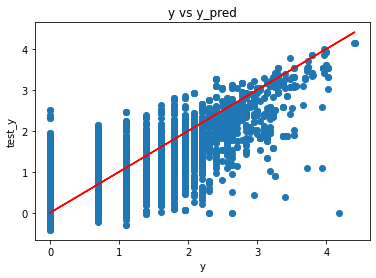

In [ ]:
# 散布図を描画(真値 vs 予測値)
plt.plot(test_y, test_y, color = 'red', label = 'x=y') # 直線y = x (真値と予測値が同じ場合は直線状に点がプロットされる)
plt.scatter(test_y, pred) # 散布図のプロット
plt.xlabel('y') # x軸ラベル
plt.ylabel('test_y') # y軸ラベル
plt.title('y vs y_pred') # グラフタイトル

In [ ]:
from sklearn.metrics import r2_score
r2_score(test_y, pred)

0.6462149558192872

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test_y, pred))

0.5102987809502313

In [ ]:
#スコアが低いから特徴量を考え直す